In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [79]:

diabetes_data = pd.read_csv("../data/diabetes.csv")
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Побудувати графік розподілу випадкової змінної для кожної з чисельних ознак.

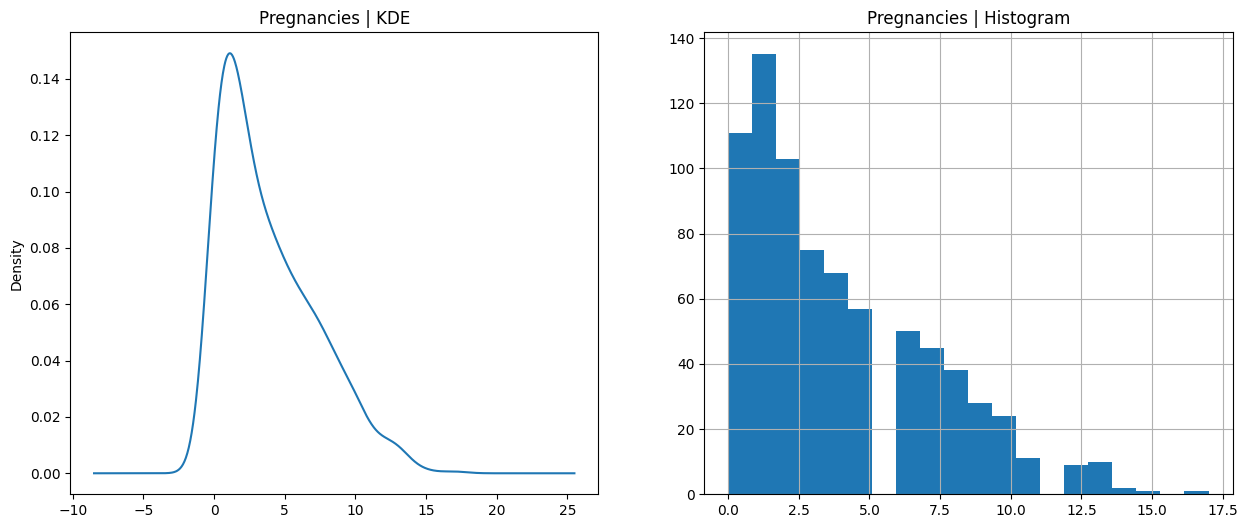

In [80]:
# Pregnancies
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data['Pregnancies'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Pregnancies | KDE')

diabetes_data['Pregnancies'].hist(bins=20, ax=axes[1])
axes[1].set_title('Pregnancies | Histogram')

plt.show()
# Висновок:
# Спочатку подумав, що схоже на експоненту.
# Але, погравшись з відображеннями, на гістаграмі наче чітко бачу LogNormal

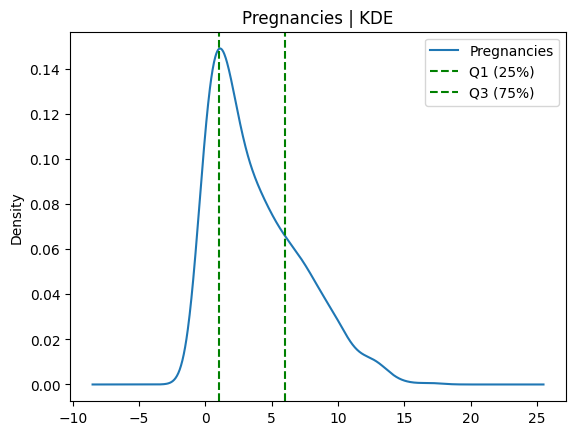

In [81]:
# Pregnancies

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data['Pregnancies'].quantile(0.25)
q3 = diabetes_data['Pregnancies'].quantile(0.75)
ax = diabetes_data['Pregnancies'].plot(kind='kde', title='Pregnancies | KDE')
ax.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
ax.axvline(q3, color='green', linestyle='--', label='Q3 (75%)')
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Візуально схожий на LogNormal

In [82]:
# Pregnancies
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data['Pregnancies'])

stat, p_value, p_value > .05
# Висновок:
# Маємо 0.90 не дуже близько до нормалі, відповідно  p<= 0.05, тож нормальність відхиляємо


(np.float64(0.9042812714701655), np.float64(1.6092572358874225e-21), np.False_)

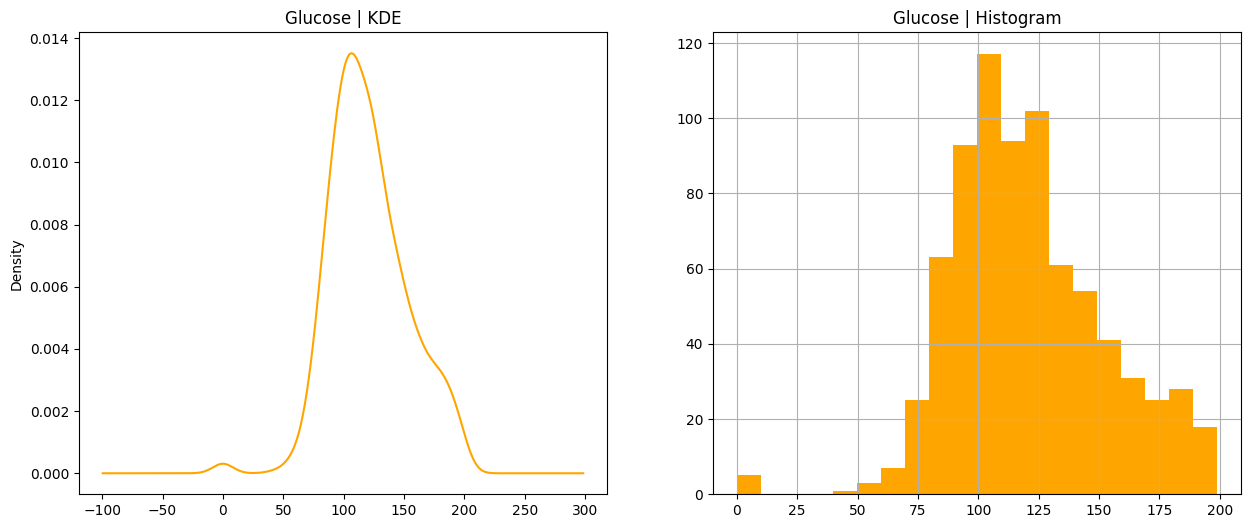

In [83]:
# Glucose
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data['Glucose'].plot(kind='kde', ax=axes[0], color='orange')
axes[0].set_title('Glucose | KDE')

diabetes_data['Glucose'].hist(bins=20, ax=axes[1], color='orange')
axes[1].set_title('Glucose | Histogram')

plt.show()
# Висновок:
# Тут більше проглядається Gamma, до ормального розподілу певно ще не дотягує

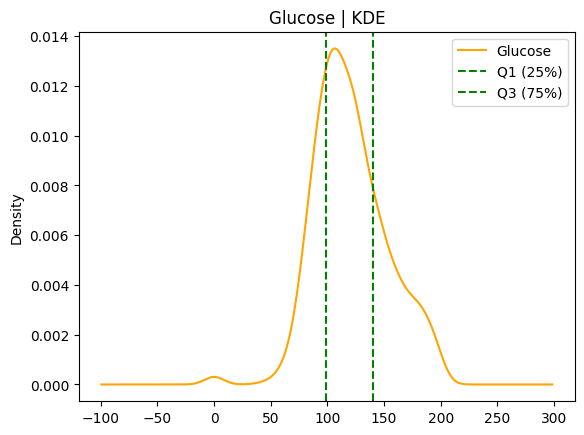

In [84]:
# Glucose

# Побудувати вертикальні лінії IQR для кожного графіку.
q1 = diabetes_data['Glucose'].quantile(0.25)
q3 = diabetes_data['Glucose'].quantile(0.75)
ax = diabetes_data['Glucose'].plot(kind='kde', color='orange', title='Glucose | KDE')
ax.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
ax.axvline(q3, color='green', linestyle='--', label='Q3 (75%)')
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Короткий і різкий зліва, також присутня аномалія в районі нуля, більший і пологий зправа.

# Розмір IQR відносно решти розподілу
# - Середньої ширини, зсунутий вправо відносно піку.

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Схожий на попередній, але більше проглядається Gamma

In [85]:
# Glucose
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(diabetes_data['Glucose'])

stat, p_value, p_value > .05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9701038379391942), np.float64(1.9863474999979633e-11), np.False_)

Text(0.5, 1.0, 'BloodPressure | Histogram')

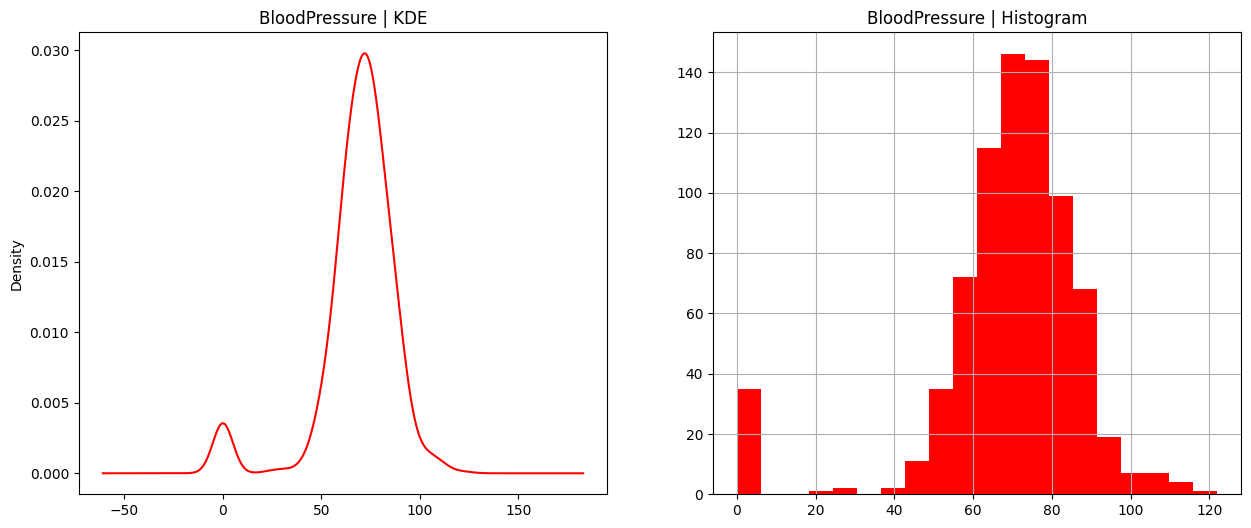

In [86]:
# BloodPressure
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data['BloodPressure'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title('BloodPressure | KDE')

diabetes_data['BloodPressure'].hist(bins=20, ax=axes[1], color='red')
axes[1].set_title('BloodPressure | Histogram')

# Висновок:
# Кровʼяний тиск в районі нуля то зовсім вже біда.
# Тож я схильний ввважати що тут ми маємо нормальний розподіл і аномальні занчення, які є сенс фільтрувати оскільки
# вони неправдоподібні.

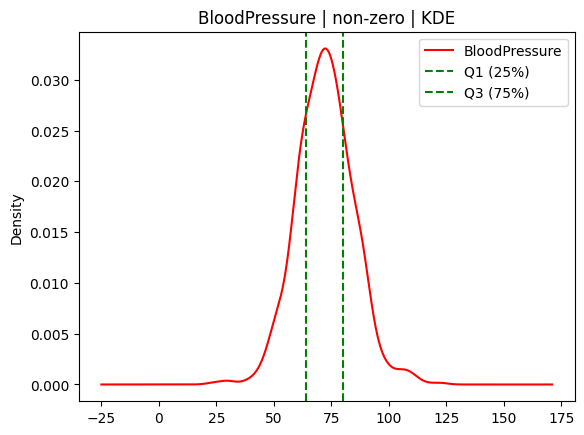

In [87]:
# BloodPressure

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_bp = diabetes_data.loc[diabetes_data['BloodPressure'] != 0, 'BloodPressure']
q1 = non_zero_bp.quantile(0.25)
q3 = non_zero_bp.quantile(0.75)
ax = non_zero_bp.plot(kind='kde', color='red', title='BloodPressure | non-zero | KDE')
ax.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
ax.axvline(q3, color='green', linestyle='--', label='Q3 (75%)')
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости досить короткі, правий трохи довший - маємо невичку асиметрію.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо певні погрішності з правого боку

In [88]:
# BloodPressure
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_bp)

stat, p_value, p_value > .05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо



(np.float64(0.990314515469343), np.float64(9.451377169640385e-05), np.False_)

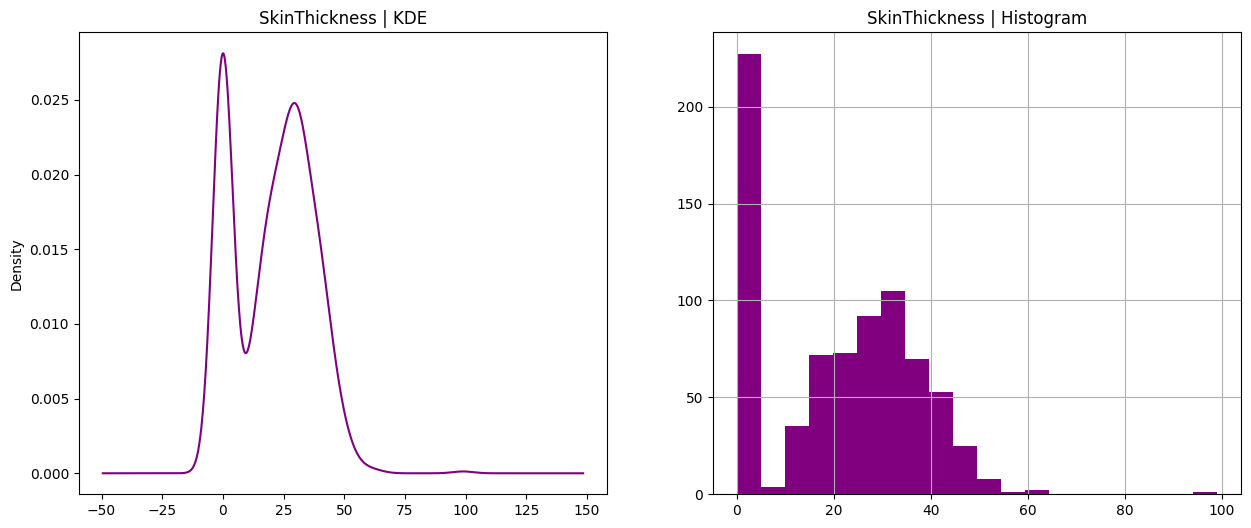

In [89]:
# SkinThickness
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

diabetes_data['SkinThickness'].plot(kind='kde', ax=axes[0], color='purple')
axes[0].set_title('SkinThickness | KDE')

diabetes_data['SkinThickness'].hist(bins=20, ax=axes[1], color='purple')
axes[1].set_title('SkinThickness | Histogram')

plt.show()
# Висновок:
# Товщина шкіри нуль теж виглядає не надто переконливо.
# Як і в попередньому, тут ми маємо нормальний розподіл і аномальні занчення, які є сенс фільтруються.

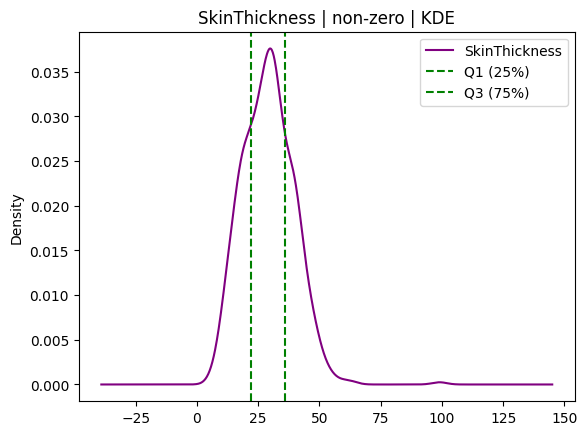

In [90]:
# SkinThickness

# Побудувати вертикальні лінії IQR для кожного графіку.
non_zero_st = diabetes_data.loc[diabetes_data['SkinThickness'] != 0, 'SkinThickness']
q1 = non_zero_st.quantile(0.25)
q3 = non_zero_st.quantile(0.75)
ax = non_zero_st.plot(kind='kde', color='purple', title='SkinThickness | non-zero | KDE')
ax.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
ax.axvline(q3, color='green', linestyle='--', label='Q3 (75%)')
ax.legend()
plt.show()

# Подивитись на форму розподілу. Описати наступне:
# Розмір і форму хвостів
# - Хвости короткі, майже симетричні. Хоч пік і зміщений правіше.

# Розмір IQR відносно решти розподілу
# - Вузький, охоплює по суті лише основну масу в районі піку

# Наскільки розподіл нормальний (або схожий на будь-який з відомих)
# - Дуже схожий на нормальний, але маємо ще якісь погрішності в районі 100, ну і пік не ідеально рівний


In [91]:
# SkinThickness
# Зробити тест Шапіро-Уілка для кожної з неперервних змінних.
stat, p_value = shapiro(non_zero_st)

stat, p_value, p_value > .05
# Висновок:
# Маємо 0.97 що дуже близько до нормалі, проте  p<= 0.05 тож нормальність відхиляємо

(np.float64(0.9679992373343264), np.float64(1.775690206383192e-09), np.False_)